In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
weather = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/Tareq-BD/ECGR-5105/main/Weather%20Dataset.csv"))
weather.head()

,lat,lon,time,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,...,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
0,30.0,70.0,1/1/2015,0.14300,0.10950,0.12600,5.60,1.75,0.75,40.75,...,296.8,282.67500,296.725,4.350000,1.275001,-2.599999,-6.600,-3.925,-3.200000,-9999.0
1,30.0,70.0,1/2/2015,0.02925,0.02450,0.06525,8.40,20.50,19.00,34.50,...,296.8,284.15000,296.700,12.125002,5.850001,-1.749999,-5.075,-3.975,-2.200000,-9999.0
2,30.0,70.0,1/3/2015,0.18125,0.16325,0.10375,11.35,29.50,46.50,41.00,...,296.8,284.67500,296.600,26.575000,10.875000,0.775001,-13.925,-5.725,-0.874999,-9999.0
3,30.0,70.0,1/4/2015,0.12350,0.07725,-0.09000,12.40,36.50,38.75,40.50,...,296.8,285.15002,296.550,35.949997,18.375000,1.325000,-20.400,-6.050,2.925002,-9999.0
4,30.0,70.0,1/5/2015,-0.04575,0.04225,0.01700,11.25,20.75,22.25,38.75,...,296.8,285.75000,296.500,40.700000,17.400002,3.175001,-7.900,-6.550,1.575000,-9999.0


In [ ]:
m = len(weather)
m

17902

In [ ]:
weather.shape

(17902, 21)

In [ ]:

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(weather, train_size = 0.7, test_size = 0.3)

df_train.shape

(12531, 21)

In [ ]:
df_test.shape

(5371, 21)

In [ ]:
num_vars = ['lat', 'lon','omega_x', 'omega_y', 'omega', 'pr_wtr', 'rhum_x','rhum_y', 'rhum', 'slp', 'tmp_x', 'tmp_y', 'tmp','uwnd_x', 'uwnd_y', 'uwnd', 'vwnd_x', 'vwnd_y', 'vwnd','rain']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
14064,25.0,72.5,0.09825,0.07725,-0.00475,17.400000,3.50,23.75,19.00,100687.5,297.6,305.35000,296.80000,-0.699998,1.650001,5.750001,-11.474999,-3.300000,0.475002,0.0
8981,27.5,75.0,0.04725,-0.04525,0.01625,12.425001,16.25,34.50,36.75,101485.0,296.2,287.55000,294.30000,50.525000,26.150002,1.925002,3.800000,2.275001,-1.199999,0.0
7703,27.5,72.5,0.07375,0.07950,0.01075,49.600000,13.25,56.25,53.50,99560.0,296.7,309.44998,299.07498,-0.299999,-0.799998,1.675002,-6.825000,-7.074999,5.825000,0.0
3731,30.0,75.0,0.09225,0.02700,-0.05300,28.675000,13.00,40.25,27.25,100165.0,297.6,308.20000,298.10000,3.875001,5.525001,1.425002,-6.375000,-4.500000,1.675000,0.0
3370,30.0,75.0,-0.01250,-0.19925,-0.12800,34.350000,17.50,54.00,28.00,99677.5,297.6,311.44998,297.80000,10.025000,7.350001,3.650001,1.475000,0.650000,2.075000,0.0


In [ ]:
df_Newtrain.shape

(12531, 20)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(20)

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
14064,0.0,0.333333,0.608827,0.732563,0.621372,0.233948,0.0350,0.2375,0.1900,0.502604,0.687500,0.767097,0.455224,0.234103,0.401093,0.651952,0.326577,0.361812,0.458281,0.968428
8981,0.5,0.666667,0.561440,0.625763,0.643536,0.165984,0.1625,0.3450,0.3675,0.710286,0.468750,0.307742,0.268657,0.944525,0.936612,0.522071,0.560229,0.506149,0.374844,0.968428
7703,0.5,0.333333,0.586063,0.734525,0.637731,0.673839,0.1325,0.5625,0.5350,0.208984,0.546875,0.872903,0.624999,0.239650,0.347541,0.513582,0.397706,0.264078,0.724782,0.968428
3731,1.0,0.666667,0.603252,0.688753,0.570449,0.387978,0.1300,0.4025,0.2725,0.366536,0.687500,0.840645,0.552239,0.297552,0.485792,0.505093,0.404589,0.330744,0.518057,0.968428
3370,1.0,0.666667,0.505923,0.491500,0.491293,0.465505,0.1750,0.5400,0.2800,0.239583,0.687500,0.924516,0.529851,0.382844,0.525683,0.580645,0.524665,0.464078,0.537983,0.968428
11919,0.0,0.000000,0.476887,0.644289,0.586016,0.474044,0.1350,0.1050,0.5675,0.451172,1.000000,0.776774,0.559701,0.441439,0.492896,0.668930,0.585851,0.530744,0.582814,0.000000
12309,0.0,0.000000,0.489895,0.680471,0.658575,0.408811,0.0925,0.1950,0.3725,0.494792,1.000000,0.870968,0.664179,0.295472,0.346995,0.578098,0.583174,0.508091,0.473225,0.000000
8047,0.5,0.333333,0.613705,0.728204,0.553298,0.514003,0.0525,0.5050,0.4275,0.330078,0.546875,0.821290,0.552239,0.426531,0.445355,0.507640,0.433270,0.363107,0.509340,0.968506
14446,0.0,0.666667,0.603252,0.676330,0.540106,0.348019,0.0800,0.4375,0.2525,0.391927,0.421875,0.828387,0.468284,0.305527,0.403279,0.679117,0.235564,0.325566,0.377335,0.968428
14983,0.0,0.666667,0.594890,0.657367,0.632718,0.175546,0.1250,0.1075,0.3425,0.673828,0.421875,0.458065,0.483210,0.486513,0.484153,0.445671,0.407648,0.374757,0.302615,0.968428


In [ ]:
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtest.head(20)

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
227,1.0,0.000000,0.584524,0.703558,0.596264,0.455593,0.100503,0.624041,0.371212,0.388430,0.562500,0.812253,0.887218,0.332652,0.326051,0.511278,0.506334,0.367294,0.562598,0.000000
7583,0.5,0.333333,0.468894,0.622567,0.551485,0.258305,0.366834,0.856777,0.300505,0.617292,0.546875,0.596837,0.233083,0.496568,0.501510,0.566729,0.659117,0.630110,0.581567,0.975484
12830,0.0,0.000000,0.672236,0.766070,0.640565,0.166780,0.032663,0.107417,0.166667,0.607756,1.000000,0.609354,0.932331,0.525774,0.421334,0.539474,0.469482,0.391953,0.564829,0.000000
12556,0.0,0.000000,0.557045,0.719284,0.621648,0.183390,0.017588,0.053708,0.401515,0.701208,1.000000,0.393939,0.631579,0.495838,0.492215,0.570489,0.542802,0.461389,0.548092,0.000000
5461,1.0,1.000000,0.417235,0.474150,0.538554,0.229492,0.801508,0.526854,0.323232,0.589955,0.000000,0.567194,0.124060,0.617041,0.500348,0.446429,0.668714,0.665152,0.577103,0.975484
16313,0.0,1.000000,0.513517,0.666797,0.556991,0.711186,0.457286,0.790281,0.727273,0.389065,0.421875,0.638472,0.686468,0.125584,0.181966,0.481955,0.493666,0.395198,0.262442,0.975739
6715,0.5,0.000000,0.606947,0.760566,0.626437,0.430847,0.040201,0.465473,0.454545,0.450731,0.703125,0.832016,0.977444,0.299065,0.299907,0.507519,0.492898,0.406879,0.458826,0.975484
9263,0.5,0.666667,0.789624,0.840771,0.655412,0.071525,0.040201,0.025575,0.133838,0.654800,0.468750,0.386034,0.558271,0.519568,0.502092,0.667293,0.345873,0.190136,0.279179,0.975484
11144,0.5,1.000000,0.533963,0.678003,0.678879,0.226441,0.394472,0.347826,0.313131,0.682772,0.562500,0.377470,0.315789,0.740070,0.729259,0.533835,0.579271,0.399091,0.328275,0.975484
7699,0.5,0.333333,0.585843,0.716729,0.610393,0.729831,0.419598,0.432225,0.719697,0.338843,0.546875,0.822134,0.616541,0.158878,0.201139,0.337406,0.515547,0.425049,0.455479,0.975753


In [ ]:
y_Newtrain = df_Newtrain.pop('rain')
X_Newtrain = df_Newtrain

In [ ]:
X_Newtrain.head()

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd
14064,0.0,0.333333,0.608827,0.732563,0.621372,0.233948,0.0350,0.2375,0.1900,0.502604,0.687500,0.767097,0.455224,0.234103,0.401093,0.651952,0.326577,0.361812,0.458281
8981,0.5,0.666667,0.561440,0.625763,0.643536,0.165984,0.1625,0.3450,0.3675,0.710286,0.468750,0.307742,0.268657,0.944525,0.936612,0.522071,0.560229,0.506149,0.374844
7703,0.5,0.333333,0.586063,0.734525,0.637731,0.673839,0.1325,0.5625,0.5350,0.208984,0.546875,0.872903,0.624999,0.239650,0.347541,0.513582,0.397706,0.264078,0.724782
3731,1.0,0.666667,0.603252,0.688753,0.570449,0.387978,0.1300,0.4025,0.2725,0.366536,0.687500,0.840645,0.552239,0.297552,0.485792,0.505093,0.404589,0.330744,0.518057
3370,1.0,0.666667,0.505923,0.491500,0.491293,0.465505,0.1750,0.5400,0.2800,0.239583,0.687500,0.924516,0.529851,0.382844,0.525683,0.580645,0.524665,0.464078,0.537983


In [ ]:
y_Newtrain.head()

14064    0.968428
8981     0.968428
7703     0.968428
3731     0.968428
3370     0.968428
Name: rain, dtype: float64

In [ ]:
y = y_Newtrain.values

print('y = ', y[: 5])

y =  [0.96842799 0.96842799 0.96842799 0.96842799 0.96842799]


In [ ]:
# training set preparation

X1 = df_Newtrain.values[:, 0]    
X2 = df_Newtrain.values[:, 1]             
X3 = df_Newtrain.values[:, 2]               
X4 = df_Newtrain.values[:, 3]           
X5 = df_Newtrain.values[:, 4]    
X6 = df_Newtrain.values[:, 5] 
X7 = df_Newtrain.values[:, 6] 
X8 = df_Newtrain.values[:, 7] 
X9 = df_Newtrain.values[:, 8] 
X10 = df_Newtrain.values[:, 9] 
X11 = df_Newtrain.values[:, 10] 
X12 = df_Newtrain.values[:, 11] 
X13 = df_Newtrain.values[:, 12] 
X14 = df_Newtrain.values[:, 13] 
X15 = df_Newtrain.values[:, 14] 
X16 = df_Newtrain.values[:, 15] 
X17 = df_Newtrain.values[:, 16] 
X18 = df_Newtrain.values[:, 17] 
X19 = df_Newtrain.values[:, 18] 

print('X1 = ', X1[: 5]) 
print('X2 = ', X2[: 5])

X1 =  [0.  0.5 0.5 1.  1. ]
X2 =  [0.33333333 0.66666667 0.33333333 0.66666667 0.66666667]


In [ ]:
m = len(X_Newtrain)               # size of training set
X_0 = np.ones((m, 1))             # Creating a matrix of single column of ones as X0 with the size of training set
X_0 [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# 1D arrays to 2D array conversion
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)
X_6 = X6.reshape(m, 1)
X_7 = X7.reshape(m, 1)
X_8 = X8.reshape(m, 1)
X_9 = X9.reshape(m, 1)
X_10 = X10.reshape(m, 1)
X_11 = X11.reshape(m, 1)
X_12 = X12.reshape(m, 1)
X_13 = X13.reshape(m, 1)
X_14 = X14.reshape(m, 1)
X_15 = X15.reshape(m, 1)
X_16 = X16.reshape(m, 1)
X_17 = X17.reshape(m, 1)
X_18 = X18.reshape(m, 1)
X_19 = X19.reshape(m, 1)

In [ ]:
# Final X Matrix for training
X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11, X_12, X_13, X_14, X_15, X_16, X_17, X_18, X_19))

In [ ]:
y_Newtest = df_Newtest.pop('rain')
X_Newtest = df_Newtest

In [ ]:
X_Newtest.head()

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd
227,1.0,0.000000,0.584524,0.703558,0.596264,0.455593,0.100503,0.624041,0.371212,0.388430,0.562500,0.812253,0.887218,0.332652,0.326051,0.511278,0.506334,0.367294,0.562598
7583,0.5,0.333333,0.468894,0.622567,0.551485,0.258305,0.366834,0.856777,0.300505,0.617292,0.546875,0.596837,0.233083,0.496568,0.501510,0.566729,0.659117,0.630110,0.581567
12830,0.0,0.000000,0.672236,0.766070,0.640565,0.166780,0.032663,0.107417,0.166667,0.607756,1.000000,0.609354,0.932331,0.525774,0.421334,0.539474,0.469482,0.391953,0.564829
12556,0.0,0.000000,0.557045,0.719284,0.621648,0.183390,0.017588,0.053708,0.401515,0.701208,1.000000,0.393939,0.631579,0.495838,0.492215,0.570489,0.542802,0.461389,0.548092
5461,1.0,1.000000,0.417235,0.474150,0.538554,0.229492,0.801508,0.526854,0.323232,0.589955,0.000000,0.567194,0.124060,0.617041,0.500348,0.446429,0.668714,0.665152,0.577103


In [ ]:
y_Newtest.head()

227      0.000000
7583     0.975484
12830    0.000000
12556    0.000000
5461     0.975484
Name: rain, dtype: float64

In [ ]:
y_test = y_Newtest.values
print('y_test = ', y_test[: 10])

y_test =  [0.         0.97548354 0.         0.         0.97548354 0.97573939
 0.97548354 0.97548354 0.97548354 0.97575258]


In [ ]:
# testing/validarion set preparation
X1_test = df_Newtest.values[:, 0]                
X2_test = df_Newtest.values[:, 1]                 
X3_test = df_Newtest.values[:, 2]               
X4_test = df_Newtest.values[:, 3]               
X5_test = df_Newtest.values[:, 4]     
X6_test = df_Newtest.values[:, 5]
X7_test = df_Newtest.values[:, 6]
X8_test = df_Newtest.values[:, 7]
X9_test = df_Newtest.values[:, 8]
X10_test = df_Newtest.values[:, 9]
X11_test = df_Newtest.values[:, 10]
X12_test = df_Newtest.values[:, 11]
X13_test = df_Newtest.values[:, 12]
X14_test = df_Newtest.values[:, 13]
X15_test = df_Newtest.values[:, 14]
X16_test = df_Newtest.values[:, 15]
X17_test = df_Newtest.values[:, 16]
X18_test = df_Newtest.values[:, 17]
X19_test = df_Newtest.values[:, 18]


print('X1_test = ', X1_test[: 10]) 
print('X2_test = ', X2_test[: 10])
print('X3_test = ', X3_test[: 10])

X1_test =  [1.  0.5 0.  0.  1.  0.  0.5 0.5 0.5 0.5]
X2_test =  [0.         0.33333333 0.         0.         1.         1.
 0.         0.66666667 1.         0.33333333]
X3_test =  [0.58452406 0.46889424 0.67223564 0.55704549 0.41723455 0.51351704
 0.60694651 0.78962409 0.53396349 0.58584303]


In [ ]:
m_test = len(X_Newtest)             
X_0_test = np.ones((m_test, 1))     # Single column matrix of all ones
X_0_test [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# 1D arrays of validation X's to 2D array conversion

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)
X_6_test = X6_test.reshape(m_test, 1)
X_7_test = X7_test.reshape(m_test, 1)
X_8_test = X8_test.reshape(m_test, 1)
X_9_test = X9_test.reshape(m_test, 1)
X_10_test = X10_test.reshape(m_test, 1)
X_11_test = X11_test.reshape(m_test, 1)
X_12_test = X12_test.reshape(m_test, 1)
X_13_test = X13_test.reshape(m_test, 1)
X_14_test = X14_test.reshape(m_test, 1)
X_15_test = X15_test.reshape(m_test, 1)
X_16_test = X16_test.reshape(m_test, 1)
X_17_test = X17_test.reshape(m_test, 1)
X_18_test = X18_test.reshape(m_test, 1)
X_19_test = X19_test.reshape(m_test, 1)

print('X_1_test = ', X_1_test[: 5])
print('X_2_test = ', X_2_test[: 5])

X_1_test =  [[1. ]
 [0.5]
 [0. ]
 [0. ]
 [1. ]]
X_2_test =  [[0.        ]
 [0.33333333]
 [0.        ]
 [0.        ]
 [1.        ]]


In [ ]:
# Final Matrix for validation
X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test, X_6_test, X_7_test, X_8_test, X_9_test, X_10_test, X_11_test, X_12_test, X_13_test, X_14_test, X_15_test, X_16_test, X_17_test, X_18_test, X_19_test))

In [35]:
model = Sequential()
model.add(Dense(20, input_dim=20, kernel_initializer='normal', activation='relu'))
model.add(Dense(852, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 852)               17892     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 853       
Total params: 19,165
Trainable params: 19,165
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X, y, epochs=250, batch_size=150, verbose=1, validation_split=0.3)
predictions = model.predict(X_test)

Epoch 1/250
59/59 [==============================] - 3s 37ms/step - loss: 0.1897 - mse: 0.1897 - mae: 0.3456 - val_loss: 0.0924 - val_mse: 0.0924 - val_mae: 0.2544
Epoch 2/250
59/59 [==============================] - 1s 14ms/step - loss: 0.0860 - mse: 0.0860 - mae: 0.2463 - val_loss: 0.0765 - val_mse: 0.0765 - val_mae: 0.2315
Epoch 3/250
59/59 [==============================] - 1s 15ms/step - loss: 0.0630 - mse: 0.0630 - mae: 0.1950 - val_loss: 0.0500 - val_mse: 0.0500 - val_mae: 0.1469
Epoch 4/250
59/59 [==============================] - 1s 14ms/step - loss: 0.0413 - mse: 0.0413 - mae: 0.1240 - val_loss: 0.0348 - val_mse: 0.0348 - val_mae: 0.1090
Epoch 5/250
59/59 [==============================] - 1s 14ms/step - loss: 0.0308 - mse: 0.0308 - mae: 0.1004 - val_loss: 0.0309 - val_mse: 0.0309 - val_mae: 0.0952
Epoch 6/250
59/59 [==============================] - 1s 19ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.0880 - val_loss: 0.0208 - val_mse: 0.0208 - val_mae: 0.0798
Epoch 7/250
59/5

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


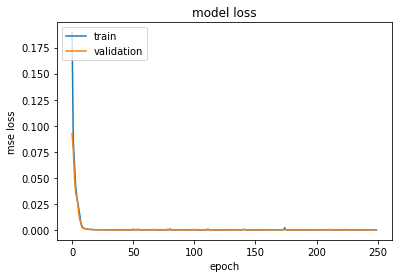

In [37]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model loss')
plt.ylabel('mse loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()